<a href="https://colab.research.google.com/github/hcantekin/hcantekin.github.io/blob/main/DRinterests_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('DRinterestsG.csv')
df.head()

,gender,interests
0,All,"""Democratic Party (United States)"":,""Heidi Hei..."
1,All,"""ActBlue"":,""Center for American Progress"":,""Ch..."
2,All,"""John Kasich"":,""Republican Party (United State..."
3,All,"""Liberty"":,""Property tax"":,""Republican Party (..."
4,Men,"""Republican Party (United States)"":"


In [11]:
df2 = df.dropna()

Creating a new column which labels each row 'Dem' or 'Rep' depending on whether the 'interests' column contains string 'Democrat' or 'Republican'. 


In [20]:
conditions = [
    (df2.interests.str.contains('Democrat')),
    (df2.interests.str.contains('Republican'))]
choices = ['Dem', 'Rep']
df2['Party'] = np.select(conditions, choices, default=0)
df2



<ipython-input-20-239ea2e266b3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Party'] = np.select(conditions, choices, default=0)


,gender,interests,Party
0,All,"""Democratic Party (United States)"":,""Heidi Hei...",Dem
1,All,"""ActBlue"":,""Center for American Progress"":,""Ch...",Dem
2,All,"""John Kasich"":,""Republican Party (United State...",Rep
3,All,"""Liberty"":,""Property tax"":,""Republican Party (...",Rep
4,Men,"""Republican Party (United States)"":",Rep
...,...,...,...
69994,All,"""Americans for Prosperity"":,""Cato Institute"":,...",Rep
69995,All,"""Barack Obama"":,""Democratic Party (United Stat...",Dem
69996,All,"""Republican Party of Texas"":",Rep
69997,All,"""Democrats"":,""Politics and social issues"":,""Re...",Dem


Checking whether any rows contain Democrat and Republican in the interest column. Do not need to drop rows which have neither string, as already filtered those out when gathering data from Meta. 

In [23]:
df2['Both'] = df2['interests'].str.contains((r'^(?=.*Republican)(?=.*Democrat)'))
df2

<ipython-input-23-0df42e47adab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Both'] = df2['interests'].str.contains((r'^(?=.*Republican)(?=.*Democrat)'))


,gender,interests,Party,Both
0,All,"""Democratic Party (United States)"":,""Heidi Hei...",Dem,False
1,All,"""ActBlue"":,""Center for American Progress"":,""Ch...",Dem,False
2,All,"""John Kasich"":,""Republican Party (United State...",Rep,False
3,All,"""Liberty"":,""Property tax"":,""Republican Party (...",Rep,False
4,Men,"""Republican Party (United States)"":",Rep,False
...,...,...,...,...
69994,All,"""Americans for Prosperity"":,""Cato Institute"":,...",Rep,False
69995,All,"""Barack Obama"":,""Democratic Party (United Stat...",Dem,False
69996,All,"""Republican Party of Texas"":",Rep,False
69997,All,"""Democrats"":,""Politics and social issues"":,""Re...",Dem,True


Dropping all the rows which had both, so left with a dataset where each row represents an Advert that is either targetted towards Dem or Rep interests. 

In [24]:
df3 = df2[df2['Both'] == False] 
df3

,gender,interests,Party,Both
0,All,"""Democratic Party (United States)"":,""Heidi Hei...",Dem,False
1,All,"""ActBlue"":,""Center for American Progress"":,""Ch...",Dem,False
2,All,"""John Kasich"":,""Republican Party (United State...",Rep,False
3,All,"""Liberty"":,""Property tax"":,""Republican Party (...",Rep,False
4,Men,"""Republican Party (United States)"":",Rep,False
...,...,...,...,...
69993,All,"""Amy Klobuchar"":,""Barack Obama"":,""Bernie Sande...",Dem,False
69994,All,"""Americans for Prosperity"":,""Cato Institute"":,...",Rep,False
69995,All,"""Barack Obama"":,""Democratic Party (United Stat...",Dem,False
69996,All,"""Republican Party of Texas"":",Rep,False


checking frequency of each gender option, clearly most Ads are targetted to All. 

Text(0, 0.5, 'Frequency')

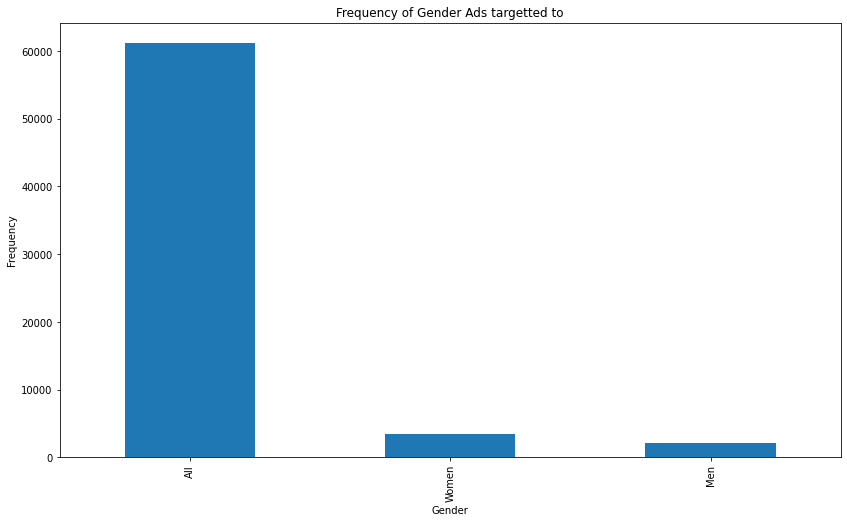

In [32]:
ax = df3['gender'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Frequency of Gender Ads targetted to")
ax.set_xlabel("Gender")
ax.set_ylabel("Frequency")

In [37]:
df4 = df3.groupby(["gender", "Party"]).size().reset_index(name="Frequency")
df4

,gender,Party,Frequency
0,All,Dem,29867
1,All,Rep,31273
2,Men,Dem,218
3,Men,Rep,1840
4,Women,Dem,1871
5,Women,Rep,1614


In [38]:

DRinterestsG = list(df4.T.to_dict().values())
open('DRinterestsG.json', 'w').write(json.dumps(DRinterestsG))

329